In [46]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.dates as mdates

In [3]:
data = pd.read_csv('../data/covid/covid_19_data.csv')
data.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [77]:
data['Country/Region'].unique()

array(['Mainland China', 'Hong Kong', 'Macau', 'Taiwan', 'US', 'Japan',
       'Thailand', 'South Korea', 'Singapore', 'Philippines', 'Malaysia',
       'Vietnam', 'Australia', 'Mexico', 'Brazil', 'Colombia', 'France',
       'Nepal', 'Canada', 'Cambodia', 'Sri Lanka', 'Ivory Coast',
       'Germany', 'Finland', 'United Arab Emirates', 'India', 'Italy',
       'UK', 'Russia', 'Sweden', 'Spain', 'Belgium', 'Others', 'Egypt',
       'Iran', 'Israel', 'Lebanon', 'Iraq', 'Oman', 'Afghanistan',
       'Bahrain', 'Kuwait', 'Austria', 'Algeria', 'Croatia',
       'Switzerland', 'Pakistan', 'Georgia', 'Greece', 'North Macedonia',
       'Norway', 'Romania', 'Denmark', 'Estonia', 'Netherlands',
       'San Marino', ' Azerbaijan', 'Belarus', 'Iceland', 'Lithuania',
       'New Zealand', 'Nigeria', 'North Ireland', 'Ireland', 'Luxembourg',
       'Monaco', 'Qatar', 'Ecuador', 'Azerbaijan', 'Czech Republic',
       'Armenia', 'Dominican Republic', 'Indonesia', 'Portugal',
       'Andorra', 'Latvia

## plot china data trend

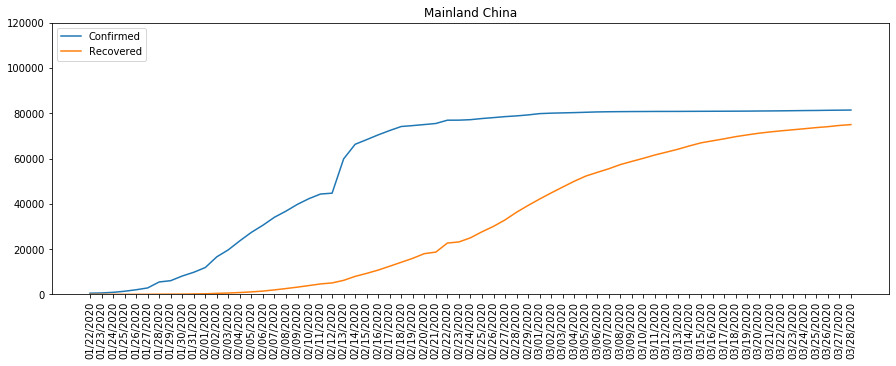

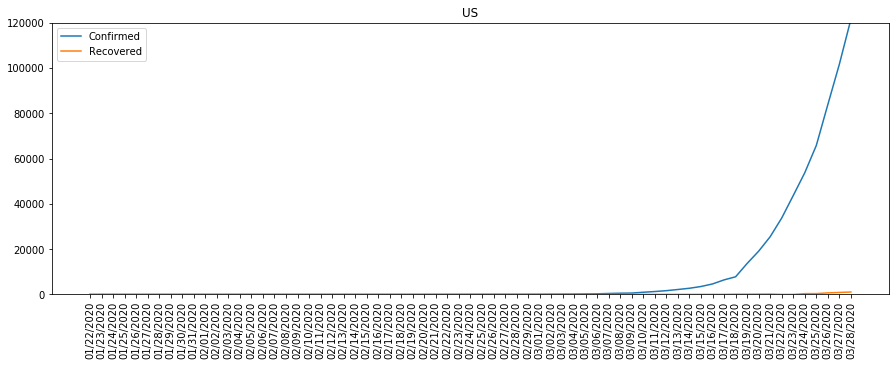

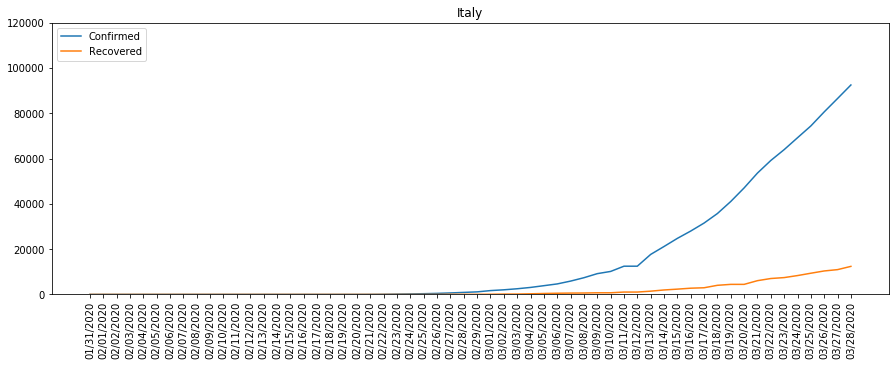

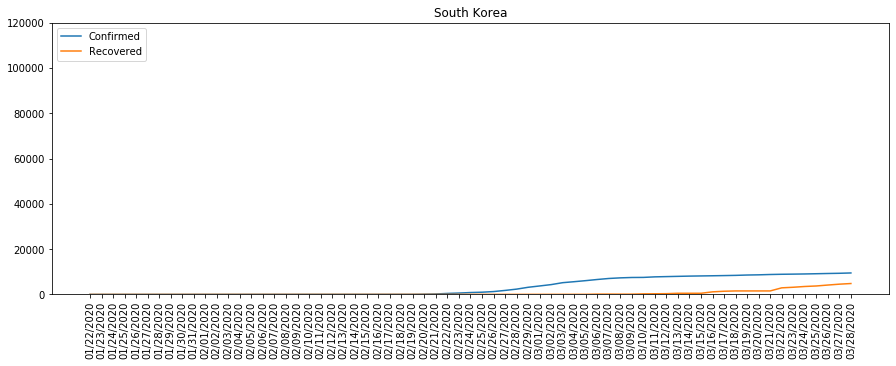

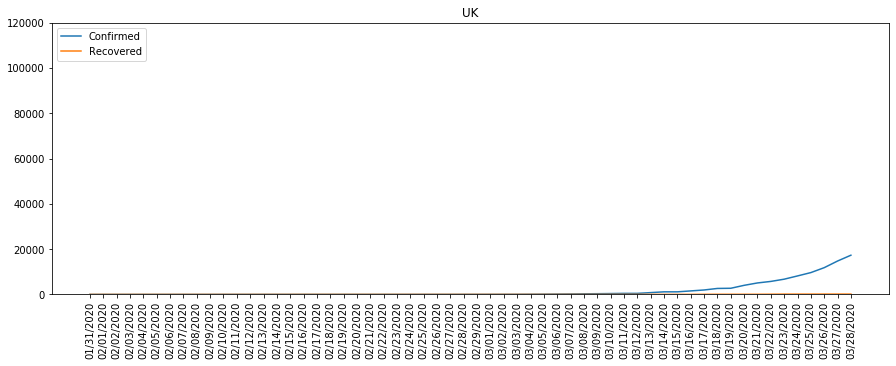

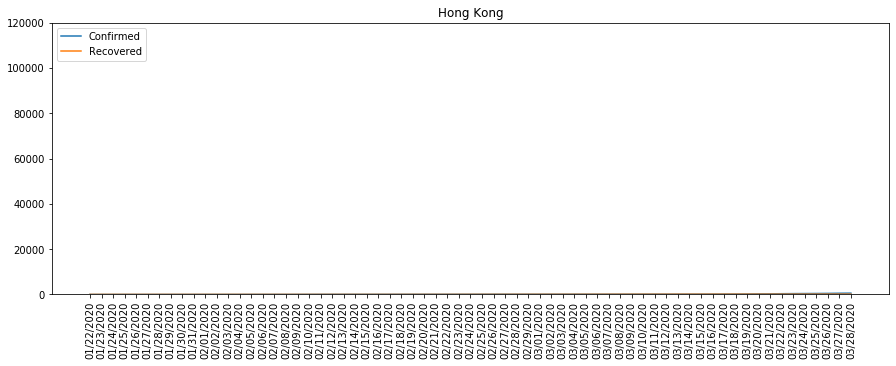

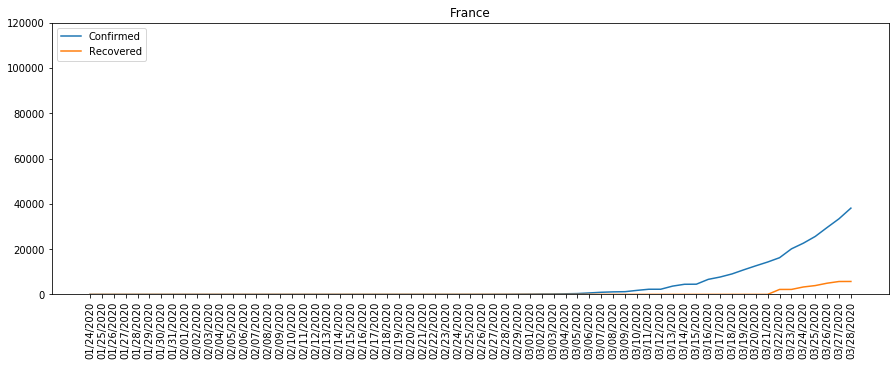

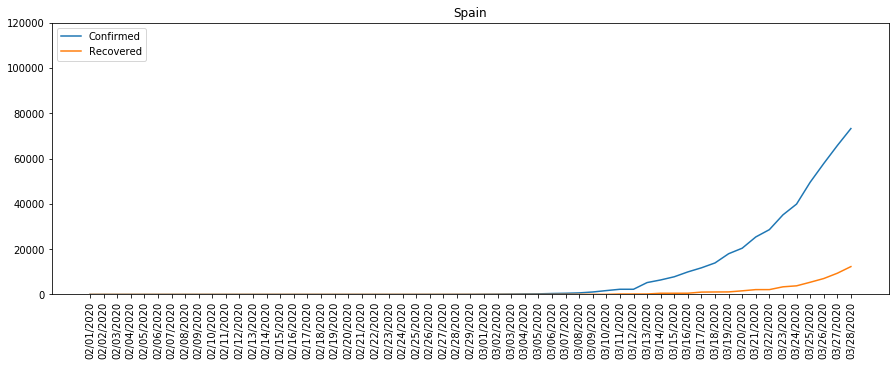

In [81]:
def aggregate(data, column, value, groupby_variable, aggregator):
    return data[data[column] == value].groupby([groupby_variable]).agg(aggregator).reset_index()

def time_series(X, Y, data, title, ax = None, figsize=(15, 5)):
    data.sort_values(by=[X], inplace = True)
    if ax == None:
        fig, ax = plt.subplots(figsize=figsize)
    ax.plot(data[X], data[Y], label = Y)
    ax.tick_params(axis='x', labelrotation=90)
    
    return ax

def twin_time(X, Y, data, title, ylim = None):
    ax = time_series(X, Y[0], data, title)
    ax = time_series(X, Y[1], data, title, ax)
    plt.title(title)
    plt.legend(loc='upper left')
    if ylim:
        plt.ylim(*ylim)
    plt.show()
    
for region in ['Mainland China', 'US', 'Italy', 'South Korea', 'UK', 'Hong Kong', 'France', 'Spain']:
    region_date_data = aggregate(data, 'Country/Region', region, 'ObservationDate', 'sum')
    twin_time(X='ObservationDate', Y = ['Confirmed', 'Recovered'], data = region_date_data, title = region, ylim = (0, 120000))

## Use what happened in one country to predict what is going to happen in another